In [1]:
#Open source dataset - evictions in New York from 2017 to present 
#Source: https://data.cityofnewyork.us/City-Government/Evictions/6z8x-wfk4
#(JSON: https://data.cityofnewyork.us/resource/6z8x-wfk4.json?$limit=100000)

In [2]:
##########################################
#Step 0: Import libraries
##########################################
import requests
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import numpy as np
#import geopandas as gpd
import seaborn as sns
from sqlalchemy import create_engine

In [3]:
##########################################
#Step 1: Import data
##########################################

#Data is of evictions in New York from 2017 to present
#Source: https://data.cityofnewyork.us/City-Government/Evictions/6z8x-wfk4

In [4]:
##JSON METHOD

#Set limit to 100,000 to capture all entries in json file
#NY_Evictions_gross = pd.read_json(r'https://data.cityofnewyork.us/resource/6z8x-wfk4.json?$limit=100000')

In [27]:
##CSV METHOD
NY_Evictions_gross = pd.read_csv(r"C:\Users\jlenehan\OneDrive - Intel Corporation\Documents\0 - Data Science\Intro to Data Analytics\UCDPA_JohnLenehan\UCDPA_JohnLenehan\Evictions.csv")
print(NY_Evictions_gross.head(5))

  Court Index Number  Docket Number        Eviction Address  \
0            8029/18          343313  220 WEST 167TH STREET   
1           74409/18           22777   145-02 ROCKAWAY BLVD   
2           33073/18            3964     1950 BRYANT AVENUE   
3           85137/17           76574      319 ELLERY STREET   
4          58266/17B          475956     318-320 E. 151 ST.   

  Eviction Apartment Number Executed Date Marshal First Name  \
0                       2-B    11/26/2018             Thomas   
1                       NaN    05/28/2019             Edward   
2                  BASEMENT    02/21/2019              Vadim   
3                        3L    01/03/2018              Henry   
4                        1C    01/17/2018              Danny   

  Marshal Last Name Residential/Commercial   BOROUGH  Eviction Postcode  \
0               Bia            Residential     BRONX              10452   
1             Guida            Residential    QUEENS              11436   
2       Bar

In [ ]:
##########################################
#Step 2: Describe data
##########################################

In [40]:
NY_Evictions = NY_Evictions_gross
#[['court_index_number', 'docket_number', 'eviction_address',
 #      'eviction_apt_num', 'executed_date', 'marshal_first_name',
  #     'marshal_last_name', 'residential_commercial_ind', 'borough',
   #    'eviction_zip', 'ejectment', 'eviction_possession', 'community_board', 'council_district', 'census_tract',
    #   'bin', 'bbl', 'nta']]

In [41]:
print(NY_Evictions.columns)

Index(['Court Index Number', 'Docket Number ', 'Eviction Address',
       'Eviction Apartment Number', 'Executed Date', 'Marshal First Name',
       'Marshal Last Name', 'Residential/Commercial', 'BOROUGH',
       'Eviction Postcode', 'Ejectment', 'Eviction/Legal Possession',
       'Latitude', 'Longitude', 'Community Board', 'Council District',
       'Census Tract', 'BIN', 'BBL', 'NTA', 'Year', 'Marshal'],
      dtype='object')


In [42]:
print(NY_Evictions.head())

  Court Index Number  Docket Number        Eviction Address  \
0            8029/18          343313  220 WEST 167TH STREET   
1           74409/18           22777   145-02 ROCKAWAY BLVD   
2           33073/18            3964     1950 BRYANT AVENUE   
3           85137/17           76574      319 ELLERY STREET   
4          58266/17B          475956     318-320 E. 151 ST.   

  Eviction Apartment Number Executed Date Marshal First Name  \
0                       2-B    2018-11-26             Thomas   
1                       NaN    2019-05-28             Edward   
2                  BASEMENT    2019-02-21              Vadim   
3                        3L    2018-01-03              Henry   
4                        1C    2018-01-17              Danny   

  Marshal Last Name Residential/Commercial   BOROUGH  Eviction Postcode  ...  \
0               Bia            Residential     BRONX              10452  ...   
1             Guida            Residential    QUEENS              11436  ...

In [43]:
print(NY_Evictions.describe())

       Docket Number   Eviction Postcode      Latitude     Longitude  \
count    70166.000000       70166.000000  63418.000000  63418.000000   
mean    152621.121455       10794.114642     40.751723    -73.908298   
std     147196.950665         519.241108      0.091144      0.068419   
min          1.000000           0.000000     40.499050    -74.251262   
25%      60322.750000       10454.000000     40.672157    -73.945088   
50%      92436.000000       10473.000000     40.752391    -73.910000   
75%     288142.750000       11229.000000     40.836407    -73.871685   
max     496987.000000       12221.000000     40.911588    -73.701430   

       Community Board  Council District   Census Tract           BIN  \
count     63418.000000      63418.000000   63418.000000  6.329000e+04   
mean          8.002618         23.821991    8426.561686  2.705794e+06   
std           4.576517         13.755295   21546.774078  1.116501e+06   
min           1.000000          1.000000       1.000000  1.

In [44]:
print(NY_Evictions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70166 entries, 0 to 70165
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Court Index Number         70166 non-null  object        
 1   Docket Number              70166 non-null  int64         
 2   Eviction Address           70166 non-null  object        
 3   Eviction Apartment Number  58391 non-null  object        
 4   Executed Date              70166 non-null  datetime64[ns]
 5   Marshal First Name         70166 non-null  object        
 6   Marshal Last Name          70166 non-null  object        
 7   Residential/Commercial     70166 non-null  object        
 8   BOROUGH                    70166 non-null  object        
 9   Eviction Postcode          70166 non-null  int64         
 10  Ejectment                  70166 non-null  object        
 11  Eviction/Legal Possession  70166 non-null  object        
 12  Lati

In [ ]:
##########################################
#Step 3: Clean data
##########################################

In [45]:
#ADDING YEAR INFO
#NOTE JSON COLUMNS WILL NEED TO BE CHANGED

NY_Evictions['Executed Date']=pd.to_datetime(NY_Evictions['Executed Date'])
NY_Evictions['Year']=pd.DatetimeIndex(NY_Evictions['Executed Date']).year
print(NY_Evictions.head(5))

  Court Index Number  Docket Number        Eviction Address  \
0            8029/18          343313  220 WEST 167TH STREET   
1           74409/18           22777   145-02 ROCKAWAY BLVD   
2           33073/18            3964     1950 BRYANT AVENUE   
3           85137/17           76574      319 ELLERY STREET   
4          58266/17B          475956     318-320 E. 151 ST.   

  Eviction Apartment Number Executed Date Marshal First Name  \
0                       2-B    2018-11-26             Thomas   
1                       NaN    2019-05-28             Edward   
2                  BASEMENT    2019-02-21              Vadim   
3                        3L    2018-01-03              Henry   
4                        1C    2018-01-17              Danny   

  Marshal Last Name Residential/Commercial   BOROUGH  Eviction Postcode  ...  \
0               Bia            Residential     BRONX              10452  ...   
1             Guida            Residential    QUEENS              11436  ...

In [35]:
#CONCATENATING MARSHAL NAMES
NY_Evictions['Marshal']=NY_Evictions['Marshal First Name']+' '+NY_Evictions['Marshal Last Name']
print(NY_Evictions.head())

  Court Index Number  Docket Number        Eviction Address  \
0            8029/18          343313  220 WEST 167TH STREET   
1           74409/18           22777   145-02 ROCKAWAY BLVD   
2           33073/18            3964     1950 BRYANT AVENUE   
3           85137/17           76574      319 ELLERY STREET   
4          58266/17B          475956     318-320 E. 151 ST.   

  Eviction Apartment Number Executed Date Marshal First Name  \
0                       2-B    2018-11-26             Thomas   
1                       NaN    2019-05-28             Edward   
2                  BASEMENT    2019-02-21              Vadim   
3                        3L    2018-01-03              Henry   
4                        1C    2018-01-17              Danny   

  Marshal Last Name Residential/Commercial   BOROUGH  Eviction Postcode  ...  \
0               Bia            Residential     BRONX              10452  ...   
1             Guida            Residential    QUEENS              11436  ...

In [46]:
NY_Evictions.columns

Index(['Court Index Number', 'Docket Number ', 'Eviction Address',
       'Eviction Apartment Number', 'Executed Date', 'Marshal First Name',
       'Marshal Last Name', 'Residential/Commercial', 'BOROUGH',
       'Eviction Postcode', 'Ejectment', 'Eviction/Legal Possession',
       'Latitude', 'Longitude', 'Community Board', 'Council District',
       'Census Tract', 'BIN', 'BBL', 'NTA', 'Year', 'Marshal'],
      dtype='object')

In [47]:
NY_Evictions = NY_Evictions[['Court Index Number', 'Docket Number ', 'Eviction Address',
       'Eviction Apartment Number', 'Executed Date','Year', 'Marshal','Residential/Commercial', 'BOROUGH',
       'Eviction Postcode', 'Ejectment', 'Eviction/Legal Possession',
       'Latitude', 'Longitude', 'Community Board', 'Council District',
       'Census Tract', 'BIN', 'BBL', 'NTA',]]
print(NY_Evictions.head())

  Court Index Number  Docket Number        Eviction Address  \
0            8029/18          343313  220 WEST 167TH STREET   
1           74409/18           22777   145-02 ROCKAWAY BLVD   
2           33073/18            3964     1950 BRYANT AVENUE   
3           85137/17           76574      319 ELLERY STREET   
4          58266/17B          475956     318-320 E. 151 ST.   

  Eviction Apartment Number Executed Date  Year            Marshal  \
0                       2-B    2018-11-26  2018         Thomas Bia   
1                       NaN    2019-05-28  2019       Edward Guida   
2                  BASEMENT    2019-02-21  2019  Vadim Barbarovich   
3                        3L    2018-01-03  2018        Henry Daley   
4                        1C    2018-01-17  2018     Danny Weinheim   

  Residential/Commercial   BOROUGH  Eviction Postcode         Ejectment  \
0            Residential     BRONX              10452  Not an Ejectment   
1            Residential    QUEENS              11

In [53]:
##########################################
#Step 4: Manipulate data
##########################################

Year           2017  2018  2019  2020  2021  2022
BOROUGH                                          
BRONX          7658  7140  6244  1088    29   697
BROOKLYN       6355  6157  5312  1005   100  1307
MANHATTAN      3450  3390  2818   521    68   578
QUEENS         4325  4452  3705   696    36   642
STATEN ISLAND   734   691   636   112    35   185


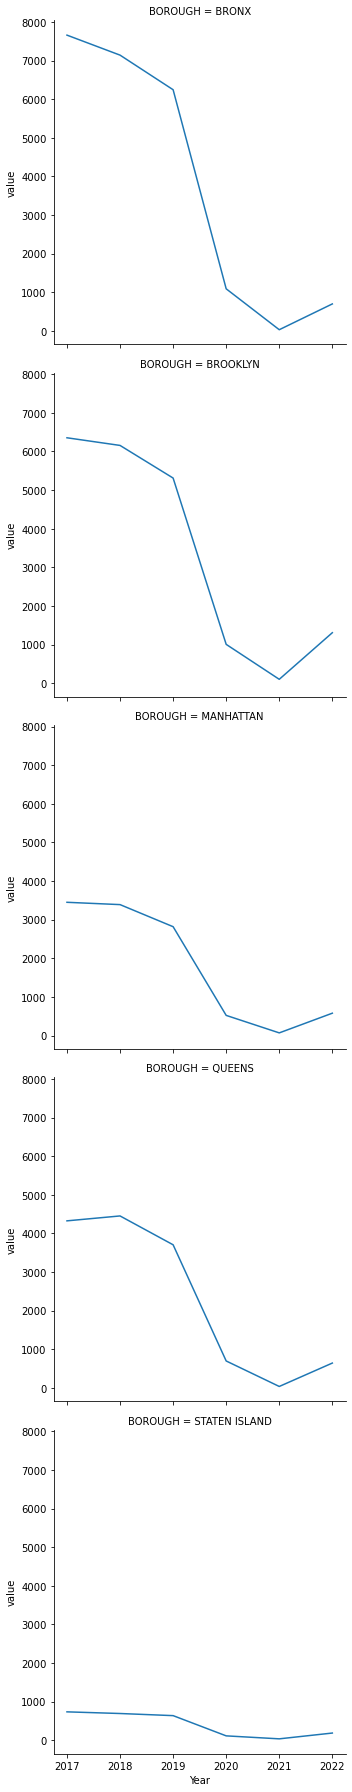

In [100]:
#Get Evictions by borough, year
evictions_by_borough = NY_Evictions.pivot_table(values='Court Index Number',index='BOROUGH', columns='Year', aggfunc='count')
print(evictions_by_borough)

borough_melt = pd.melt(evictions_by_borough,ignore_index=False)
borough_melt = borough_melt.reset_index()

sns.relplot(x=borough_melt['Year'],y=borough_melt['value'],kind='line',row=borough_melt['BOROUGH'])

plt.show()

In [60]:
#Get evictions by ejectment, year

evictions_by_borough = NY_Evictions.pivot_table(values='Court Index Number',index=['Community Board','Council District'], 
                                                columns='Year', aggfunc='count', margins=True, margins_name='Total',sort=True)
print(evictions_by_borough)


Year                                 2017     2018     2019    2020   2021  \
Community Board Council District                                             
1.0             1.0                  72.0     59.0     55.0    11.0    2.0   
                8.0                 267.0    276.0    229.0    35.0    NaN   
                17.0                162.0    184.0    163.0    34.0    NaN   
                22.0                187.0    158.0    138.0    30.0    1.0   
                26.0                 89.0     84.0     80.0    11.0    NaN   
...                                   ...      ...      ...     ...    ...   
17.0            45.0                343.0    306.0    231.0    62.0    1.0   
18.0            42.0                 26.0     14.0     14.0     2.0    NaN   
                45.0                 76.0    104.0     56.0    13.0    2.0   
                46.0                249.0    276.0    255.0    45.0    2.0   
Total                             20379.0  19700.0  16991.0  310

In [54]:
#Get evictions by marshal, year

evictions_by_borough = NY_Evictions.pivot_table(values='Court Index Number',index='Marshal', columns='Year', aggfunc='count')
print(evictions_by_borough)


Year                   2017    2018    2019   2020  2021   2022
Marshal                                                        
Alfred Locascio       484.0   505.0   362.0   74.0   6.0   90.0
Bernard Blake         146.0   155.0   128.0   22.0   NaN   17.0
Bruce Kemp            114.0   121.0   107.0   24.0   NaN   11.0
Charles Marchisotto   179.0   153.0    60.0    NaN   NaN    NaN
Danny Weinheim       2044.0  1648.0  1454.0  204.0   NaN    NaN
Darlene Barone       1098.0  1319.0  1103.0  210.0   9.0  127.0
David Smith             NaN     NaN     NaN    NaN   NaN   50.0
Edward Guida         1794.0  1742.0  1572.0  314.0   8.0  286.0
Frank Siracusa        148.0   194.0   189.0   20.0   NaN    NaN
Gary Rose             511.0   494.0   459.0   93.0  10.0  125.0
George Essock        1099.0   314.0     4.0    NaN   NaN    NaN
George Essock, Jr.    407.0  1091.0   971.0  192.0  15.0  204.0
Henry Daley          1788.0  2275.0  1970.0  453.0  30.0  515.0
Howard Schain         250.0   224.0   19

In [55]:
#Get evictions by ejectment, year

evictions_by_borough = NY_Evictions.pivot_table(values='Court Index Number',index='Ejectment', columns='Year', aggfunc='count')
print(evictions_by_borough)


Year               2017   2018   2019  2020  2021  2022
Ejectment                                              
Ejectment            19     12     13     3     2     1
Not an Ejectment  22503  21818  18702  3419   266  3408


In [ ]:
##########################################
#Step 5: Graph data
##########################################

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(x='longitude',y='latitude',data=NY_Evictions,hue='borough',fill=True)
plt.show()